In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#to check for null values 
df.isnull().sum()

In [7]:
idv=df.iloc[0:,0:11]
dv = df.iloc[0:,11:]

In [15]:
#idv gets divided between x_train and x_test
#dv gets divided between y_train and y_test
#divison is done in ratio of 80:20 as given by test_size
#random_state is the index according to which our dataset is 
#sorted
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idv,dv,test_size=0.2)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1336,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.50
194,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.70
1496,7.7,0.54,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.70
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.50
1515,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.25
...,...,...,...,...,...,...,...,...,...,...,...
138,7.8,0.56,0.19,2.1,0.081,15.0,105.0,0.99620,3.33,0.54,9.50
1266,7.2,0.57,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.30
939,6.2,0.46,0.17,1.6,0.073,7.0,11.0,0.99425,3.61,0.54,11.40
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.00


In [169]:
# to find independent variable with the 
# maximum linear correlation with dependent variable ('quality')
#stores pearson's correlation coefficient for each independent variable
pcc=[]
#pcc values lies b/w -1 and 1(both inclusive)
max=-10
max_col=''
for col in x_train.columns:
    val=np.corrcoef(x_train[col],y_train['quality'])[0][1]
    pcc.append((val,col))
abs_pcc=[]
for i,tag in pcc:
    abs_pcc.append((abs(i),tag))
sorted(abs_pcc,reverse=True)
threshold=0.20
for i,tag in abs_pcc:
    if i<threshold:
        x_train.drop(tag,axis=1,inplace=True)
x_train

0.4708101352712217 alcohol


C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,volatile acidity,citric acid,sulphates,alcohol
1336,0.50,0.00,0.45,9.50
194,0.55,0.21,0.55,9.70
1496,0.54,0.26,0.59,9.70
1082,0.38,0.30,0.59,9.50
1515,0.84,0.21,0.72,9.25
...,...,...,...,...
138,0.56,0.19,0.54,9.50
1266,0.57,0.05,0.60,10.30
939,0.46,0.17,0.54,11.40
452,0.56,0.03,0.63,10.00


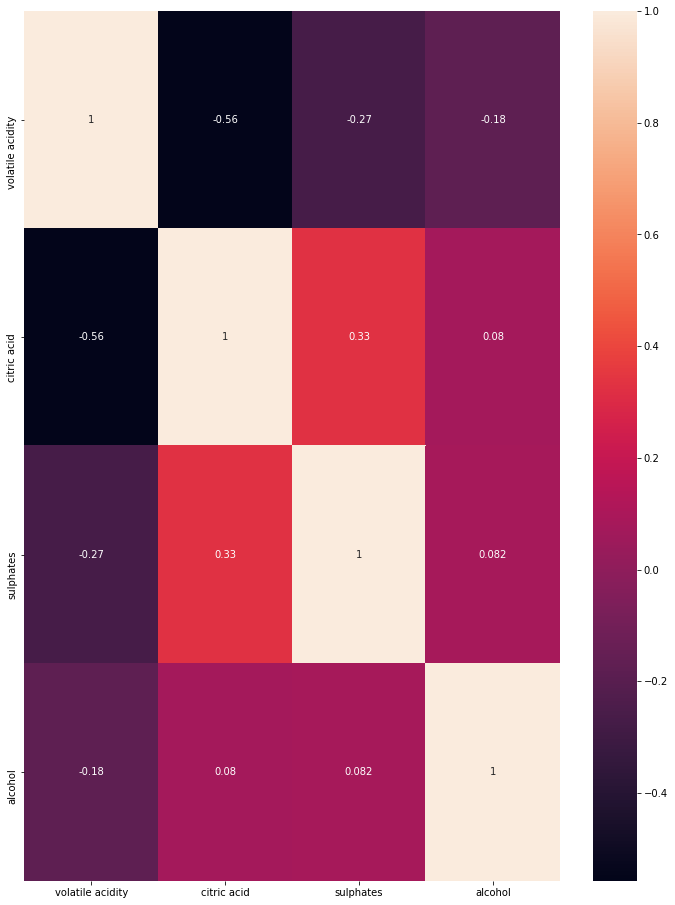

In [170]:
plt.figure(figsize=(12,16))
sns.heatmap(x_train.corr(),annot=True)

In [172]:
# idv_table= x_train.corr()
# i=0
# features=set()
# for r in idv_table.index:
#     for c in idv.columns[i+1:]:
#         if abs(idv_table[r][c])>=0.65 and r!=c:
#             if features and c in features:
#                 features.remove(c)
#         elif abs(idv_table[r][c]<0.65) and r!=c:
#             features.add(c)
#     i+=1
# print(features)
# for col in idv.columns:
#     if col not in features:
#         x_train.drop(col,axis=1)
# x_train

## Multivariate Linear regression

In [86]:
#total sum of squares
#when considering only dependent variables, sse = sst
sst=0
for i in range(len(y_train['quality'])):
    sst=np.sum((y_train-ymean)**2) 
sst

quality    829.673182
dtype: float64

In [ ]:
# r^2 value is pretty low, that means more error is contributed by our regression line or known reasons
# if we compare sse of the graph with our regression line and the one with the line
# y = ymean, then our regression line leads to a lesser value of sse than the later
# this is abit better but r^2 is still low so it isn't a good fit.

## Gradient descent

In [196]:
# y = mx+c
def optimize_loss(x,y):
    n=y.shape[0]
    alpha = 0.001
    iterate=100
    ones=np.ones((n,1))
    np.concatenate((ones,x),axis=1)
    m=x.shape[1]
    b=np.ones((m,1))
    h=np.dot(x,b)
    #initial_sse=sse
    cost=0
    for i in range(iterate):
        b0_derivative = (-2/n)*(np.sum(y-h)) #outside the loop because its derivative has no x values
        b[0][0] = b[0][0]-alpha*b0_derivative
        for j in range(1,n):
            b_derivative = (-2/n)*(np.sum((y-h)*x[:,j]))#jth feature all rows considered
            b[j][0] = b[j][0]-alpha*b_derivative 
        h=np.dot(x,b)
        cost=(np.sum((y-h)*(y-h)))
    return(cost,b)

cost,b = optimize_loss(x_train,y_train)


TypeError: '(slice(None, None, None), 1)' is an invalid key